In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'C:\Projects_ciência_dados\regression_car_price\data\interim\dataset_interim.csv')

In [3]:
dataset

,Unnamed: 0,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size,engine_cylinders,engine_turbo
0,0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7,30.0,False
1,1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,3.0,False
2,2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,NaN,3.0,False
3,3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5,35.0,False
4,4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950.0,6.0,6.0,True
4005,4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0,3.0,34.0,False
4006,4006,Porsche,Taycan,2022,2116.0,NaN,Electric,Automatic,Black,Black,None reported,NaN,90998.0,NaN,NaN,False
4007,4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0,3.5,45.0,False


Valores faltantes

In [4]:
dataset.isnull().sum()

Unnamed: 0            0
brand                 0
model                 0
model_year            0
milage                0
fuel_type           170
engine                0
transmission          0
ext_col               0
int_col               0
accident            113
clean_title         596
price                 0
engine_size         403
engine_cylinders     78
engine_turbo          0
dtype: int64

Substituindo valores nulos pela média de valores não nulos

In [5]:
mean = dataset.loc[dataset['engine_size'] > 0, 'engine_size'].mean()

In [6]:
dataset.loc[dataset['engine_size'].isnull(), 'engine_size'] = mean 

In [7]:
dataset['engine'].isnull().sum()

np.int64(0)

In [8]:
dataset.loc[(dataset['accident']) != (dataset['accident'].isnull())].mode()

,Unnamed: 0,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size,engine_cylinders,engine_turbo
0,0,Ford,M3 Base,2022.0,110000.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,15000.0,2.0,3.0,False
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4007,4007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
np.unique(dataset['int_col'], return_counts=True)

(array(['AMG Black', 'Adrenaline Red', 'Agave Green', 'Almond Beige',
        'Amber', 'Anthracite', 'Aragon Brown', 'Ash', 'BEIGE', 'BLACK',
        'Beige', 'Beluga', 'Beluga Hide', 'Bianco Polar', 'Black',
        'Black / Brown', 'Black / Express Red', 'Black / Graphite',
        'Black / Gray', 'Black / Saddle', 'Black / Stone Grey',
        'Black Onyx', 'Black w/Red Stitching', 'Black/Graphite',
        'Black/Gun Metal', 'Black/Red', 'Black/Saddle Brown', 'Blk',
        'Blue', 'Boulder', 'Brandy', 'Brown', 'Camel', 'Camel Leather',
        'Canberra Beige', 'Canberra Beige/Black', 'Cappuccino', 'Caramel',
        'Carbon Black', 'Ceramic', 'Charcoal', 'Charcoal Black',
        'Charles Blue', 'Chateau', 'Chestnut', 'Classic Red', 'Cloud',
        'Cobalt Blue', 'Cocoa / Dune', 'Dark Ash', 'Dark Auburn',
        'Dark Galvanized', 'Dark Gray', 'Deep Chestnut', 'Deep Cypress',
        'Deep Garnet', 'Diesel Gray / Black', 'Ebony',
        'Ebony / Ebony Accents', 'Ebony / Piment

In [10]:
np.unique(dataset['ext_col'], return_counts=True)

(array(['Agate Black Metallic', 'Alfa White', 'Alpine White', 'Alta White',
        'Ametrin Metallic', 'Anodized Blue Metallic',
        'Anthracite Blue Metallic', 'Antimatter Blue Metallic',
        'Apex Blue', 'Arancio Borealis', 'Arctic Gray Metallic',
        'Arctic White', 'Atomic Silver', 'Aurora Black',
        'Aventurine Green Metallic', 'BLACK', 'BLU ELEOS', 'BLUE',
        'Balloon White', 'Baltic Gray', 'Barcelona Red', 'Bayside Blue',
        'Beige', 'Beluga Black', 'Bianco Icarus Metallic', 'Bianco Isis',
        'Bianco Monocerus', 'Billet Clearcoat Metallic',
        'Billet Silver Metallic Clearcoat', 'Black', 'Black Cherry',
        'Black Clearcoat', 'Black Forest Green', 'Black Noir Pearl',
        'Black Obsidian', 'Black Raven', 'Black Sapphire Metallic', 'Blu',
        'Blue', 'Blue Caelum', 'Blue Metallic', 'Blue Reflex Mica',
        'Blueprint', 'Brands Hatch Gray Metallic',
        'Bright White Clearcoat', 'Brilliant Black',
        'Brilliant Silver Me

Simplificando as cores

In [11]:
def simplificando_cor(cor):
    
    cor = cor.lower()
    
    if 'black' in cor or 'ebony' in cor:
        return 'black'
    if 'white' in cor or 'ivory' in cor:
        return 'white'
    if 'gray' in cor or 'grey' in cor or 'charcoal' in cor or 'graphite' in cor:
        return 'gray'
    if 'silver' in cor:
        return 'silver'
    if 'red' in cor or 'rosso' in cor:
        return 'red'
    if 'yellow' in cor or 'giallo' in cor:
        return 'yellow'
    if 'blue' in cor:
        return 'blue'
    if 'orange' in cor or 'arancio' in cor:
        return 'orange'
    if 'beige' in cor or 'tan' in cor or 'carmel' in cor:
        return 'beige'
    if 'green' in cor:
        return 'green'

In [12]:
dataset['color_simplified_ext'] = dataset['ext_col'].apply(simplificando_cor)

In [13]:
dataset['color_simplified_int'] = dataset['int_col'].apply(simplificando_cor)

In [14]:
dataset['Metallic'] = dataset['ext_col'].str.contains('Metallic', case=False)

In [15]:
dataset

,Unnamed: 0,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size,engine_cylinders,engine_turbo,color_simplified_ext,color_simplified_int,Metallic
0,0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.700000,30.0,False,black,black,False
1,1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.800000,3.0,False,None,gray,False
2,2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.713394,3.0,False,blue,black,False
3,3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.500000,35.0,False,black,black,False
4,4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.000000,2.0,True,white,black,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950.0,6.000000,6.0,True,None,None,False
4005,4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0,3.000000,34.0,False,black,black,False
4006,4006,Porsche,Taycan,2022,2116.0,NaN,Electric,Automatic,Black,Black,None reported,NaN,90998.0,3.713394,NaN,False,black,black,False
4007,4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999.0,3.500000,45.0,False,blue,black,False


In [16]:
dataset.isnull().sum()

Unnamed: 0                0
brand                     0
model                     0
model_year                0
milage                    0
fuel_type               170
engine                    0
transmission              0
ext_col                   0
int_col                   0
accident                113
clean_title             596
price                     0
engine_size               0
engine_cylinders         78
engine_turbo              0
color_simplified_ext    195
color_simplified_int    392
Metallic                  0
dtype: int64

In [17]:
dataset.shape

(4009, 19)

In [18]:
(2617/4009) *100

65.27812422050387

Substituindo valores nulos de fuel type por valores da moda dos valores não nulos

In [19]:
moda_fuel_type = dataset['fuel_type'].dropna().mode()[0]
moda_fuel_type

'Gasoline'

In [20]:
dataset.loc[dataset['fuel_type'].isnull(), 'fuel_type'] = moda_fuel_type

In [21]:
dataset['fuel_type'].isnull().sum()

np.int64(0)

Substituindo valores nulos de accident por valores da moda dos valores não nulos

In [22]:
moda_accident = dataset['accident'].dropna().mode()[0]
moda_accident

'None reported'

In [23]:
dataset.loc[dataset['accident'].isnull(), 'accident'] = moda_accident

In [24]:
dataset['accident'].isnull().sum()

np.int64(0)

Substituindo valores nulos de clean title por valores da moda dos valores não nulos

In [25]:
moda_clean_title = dataset['clean_title'].dropna().mode()[0]
moda_clean_title

'Yes'

In [26]:
dataset.loc[dataset['clean_title'].isnull(), 'clean_title'] = moda_clean_title

In [27]:
dataset['clean_title'].isnull().sum()

np.int64(0)

In [28]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'engine', 'transmission', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price', 'engine_size', 'engine_cylinders',
       'engine_turbo', 'color_simplified_ext', 'color_simplified_int',
       'Metallic'],
      dtype='object')

Substituindo valores nulos da cor externa por valores da moda dos valores não nulos

In [29]:
moda_cor_externa = dataset['color_simplified_ext'].dropna().mode()[0]
moda_cor_externa

'black'

In [30]:
dataset.loc[dataset['color_simplified_ext'].isnull(), 'color_simplified_ext'] = moda_cor_externa

Substituindo valores nulos da cor externa por valores da moda dos valores não nulos

In [31]:
moda_cor_int = dataset['color_simplified_int'].dropna().mode()[0]

In [32]:
dataset.loc[dataset['color_simplified_int'].isnull(), 'color_simplified_int'] = moda_cor_int

In [33]:
dataset['color_simplified_int'].isnull().sum()

np.int64(0)

In [34]:
dataset['engine_cylinders']

0       30.0
1        3.0
2        3.0
3       35.0
4        2.0
        ... 
4004     6.0
4005    34.0
4006     NaN
4007    45.0
4008    24.0
Name: engine_cylinders, Length: 4009, dtype: float64

<Axes: xlabel='engine_cylinders', ylabel='count'>

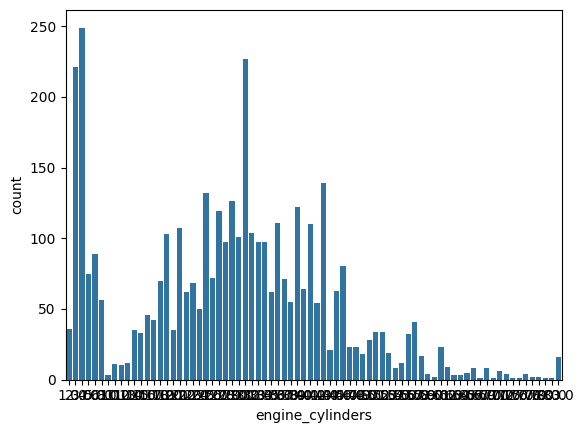

In [35]:
sns.countplot(data=dataset, x=dataset['engine_cylinders'])

In [36]:
dataset = dataset.drop('engine_cylinders', axis=1)

In [37]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'engine', 'transmission', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price', 'engine_size', 'engine_turbo',
       'color_simplified_ext', 'color_simplified_int', 'Metallic'],
      dtype='object')

In [38]:
dataset = dataset.drop(['engine', 'ext_col', 'int_col'], axis=1)

Peocurando valores inconsistentes

In [39]:
negativas = dataset.select_dtypes(['int', 'float'])
(negativas<0).any()

Unnamed: 0     False
model_year     False
milage         False
price          False
engine_size    False
dtype: bool

Brand possui amostras raras (<10), ent irei agrupar em 'Other'

In [40]:
np.unique(dataset['brand'], return_counts=True)

(array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
        'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object),
 array([ 64,  19,   9, 200, 375,  33,   1,  30, 107, 292,  28,  90,   5,
         12, 386,  91,  20,  63,  16,  72,  59,  47, 143,   2,  76,  26,
        130, 163,  52,   4,   3,  33,  34,   1,  64,   6, 315,   3,  20,
        116,   1,   1,  15, 201,  91,  17,  11,   2,   5,   6,  64,   1,
         87, 199,  59,  38,   1])

In [41]:
counts = dataset['brand'].value_counts()
rare = counts[counts < 10].index
dataset['brand'] = dataset['brand'].replace(rare, 'Other')

In [42]:
dataset.loc[dataset['brand'] == 'Other']

,Unnamed: 0,brand,model,model_year,milage,fuel_type,transmission,accident,clean_title,price,engine_size,engine_turbo,color_simplified_ext,color_simplified_int,Metallic
11,11,Other,Martin DBS Superleggera,2019,22770.0,Gasoline,8-Speed A/T,None reported,Yes,184606.0,5.200000,False,silver,black,False
44,44,Other,Air Grand Touring,2022,3552.0,Gasoline,1-Speed A/T,None reported,Yes,119999.0,3.713394,False,red,beige,False
68,68,Other,Air Grand Touring,2022,4900.0,Gasoline,1-Speed A/T,None reported,Yes,99000.0,3.713394,False,red,black,False
93,93,Other,Martin DBS Superleggera,2021,2165.0,Gasoline,8-Speed Automatic,None reported,Yes,279950.0,5.200000,True,black,black,False
129,129,Other,Air Pure,2023,1300.0,Gasoline,A/T,None reported,Yes,86900.0,3.713394,False,black,gray,False
177,177,Other,tC Base,2013,177600.0,Gasoline,6-Speed A/T,At least 1 accident or damage reported,Yes,7100.0,2.500000,False,silver,black,False
207,207,Other,Sky Base,2008,15020.0,Gasoline,A/T,None reported,Yes,18500.0,2.400000,False,silver,red,False
229,229,Other,Veyron 16.4 Grand Sport,2011,6330.0,Gasoline,7-Speed Automatic with Auto-Shift,None reported,Yes,1950995.0,8.000000,True,white,white,False
236,236,Other,2 Launch Edition,2021,12172.0,Gasoline,1-Speed Automatic,None reported,Yes,35999.0,3.713394,False,gray,gray,False
314,314,Other,Martin DBX Base,2021,2353.0,Gasoline,9-Speed Automatic,None reported,Yes,159500.0,4.000000,True,green,beige,False


Divisão em previsoras e classe

In [43]:
x = dataset.drop('price', axis=1)
x.columns

Index(['Unnamed: 0', 'brand', 'model', 'model_year', 'milage', 'fuel_type',
       'transmission', 'accident', 'clean_title', 'engine_size',
       'engine_turbo', 'color_simplified_ext', 'color_simplified_int',
       'Metallic'],
      dtype='object')

In [44]:
x = x.drop('Unnamed: 0', axis=1)

In [45]:
x.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission',
       'accident', 'clean_title', 'engine_size', 'engine_turbo',
       'color_simplified_ext', 'color_simplified_int', 'Metallic'],
      dtype='object')

In [46]:
y = pd.DataFrame({
    'price':dataset['price']
})
y.columns

Index(['price'], dtype='object')

Divisão em treino e teste

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=20)

Encontrando variáveis numéricas

In [49]:
numericas = x_train.select_dtypes(include=['int', 'float']).columns.to_list()
numericas

['model_year', 'milage', 'engine_size']

Encontrando variáveis categóricas

In [50]:
categoricas = x_train.select_dtypes(include=['object']).columns.to_list()
categoricas

['brand',
 'model',
 'fuel_type',
 'transmission',
 'accident',
 'clean_title',
 'color_simplified_ext',
 'color_simplified_int']

Aplicando Encoder e normalização

In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [52]:
preprocessor = ColumnTransformer([
    ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categoricas),
    ('scaler', StandardScaler(), numericas)
])

In [53]:
preprocessor.set_output(transform='pandas')

,transformers,"[('one_hot', ...), ('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [54]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [55]:
x_train

,one_hot__brand_Acura,one_hot__brand_Alfa,one_hot__brand_Audi,one_hot__brand_BMW,one_hot__brand_Bentley,one_hot__brand_Buick,one_hot__brand_Cadillac,one_hot__brand_Chevrolet,one_hot__brand_Chrysler,one_hot__brand_Dodge,...,one_hot__color_simplified_int_gray,one_hot__color_simplified_int_green,one_hot__color_simplified_int_orange,one_hot__color_simplified_int_red,one_hot__color_simplified_int_silver,one_hot__color_simplified_int_white,one_hot__color_simplified_int_yellow,scaler__model_year,scaler__milage,scaler__engine_size
3768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.239078,-1.215133,-0.002307
3696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.073648,-1.202605,-0.159726
3993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.908217,-1.099952,-0.528570
1248,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.746089,0.090046,-1.266259
576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411925,-0.388558,-1.266259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.073648,-0.915982,-1.635103
3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.908217,-0.646101,-0.159726
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.069533,3.018915,-0.971183
2522,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411925,-0.276300,-1.266259
